# Tutorials summary

The goal of these workshops is to do numerical exercices using MAD-X to visualize transverse dynamics concepts from a different point of view.

**Friday 14th of January**
- Tutorial 1 - Part 1: INTRODUCTION TO THE TOOLS, SMALL NUMERICAL EXERCICES (All together)
- Tutorial 1 - Part 2: FODO + PARAMETRIC PLOTS (groups of 3 students 5min+25min+15min)
- Tutorial 1 - Part 3: FODO + DIPOLES + MATCHING (groups of 3 students 5min+25min+15min)

$\color{red}{\text{WEEKEND: homework exercice (to be delivered on Monday 17th!)}}$

**Monday 17th of January**
- Tutorial 2 - Part 1: CHROMATICITY AND SEXTUPOLES (groups of 3 students 5min+25min+15min)
- Tutorial 2 - Part 2: NON-LINEARITIES AND LARGE AMPLITUDES (groups of 3 students 5min+25min+15min)
- Tutorial 2 - Part 3: TRANFER LINES (groups of 3 students 5min+25min+15min)

$\color{red}{\text{VERY IMPORTANT}}$: Save your jupyter-notebooks and download them to your computer after finishing the tutorials!! Otherwise your work will be lost!

$\color{red}{\text{Tutorial 1 and Tutorial 2 jupyter-notebooks (to be delivered as late on Friday 21st!)}}$ + the homework exercice will count for the final mark on the accelertor design workshop.

$\color{blue}{\text{Notes}}$: 

- For most of the tutorials we will split in groups of 3 students. These groups will be kept also for the accelerator design workshops on the third and fouth weeks of the JUAS course. 


- Tutors (Axel, Guido, Tessa, Davide and Nuria) will go around to help you and answer questions!


- We suggested that you try to solve the exercice by yourself but when you need help please ask your team mates or the tutor and use the screen share option.

<div>
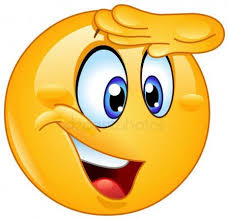
</div>


# Tutorial 1: Part 1

Objectives:

- [Get familiar with the jupyter-notebooks.](#introjupyter)

- [Get familiar with the basic python commands that we will use during the tutorials.](#intropython)

- [How do we compute the optics of a lattice?](#firstexercice)

- [Get familiar with python commands to send the information to the MAD-X code and review the the main MADX blocks for optics computtions.](#intromadx)
   

# Jupyter notebook <a id="introjupyter"><a>

- OPEN a jupyter notebook: https://github.com/fusterma/JUAS2022 and click on the binder buttom for the Tutorial1_Part1.


- EDIT/INSERT/DELATE a cell.


- RUN (press bottom on the top command line or press CAPS+ENTER).


- SAVE and DOWNLOAD: after we finish one tutorial you need to SAVE and DOWNLOAD the jupyter-notebook into your PC. Otherwise your progres will be lost! 

        - SAVE BUTTOM on the upper TAB and FILE -> DOWNLOAD. f you want to load the jupyter-notebook in another moment go to FILE -> OPEN.

In [1]:
print("Hello world")

Hello world


<div>
<img src="" width="500"/>
</div>

# Basic Pyhton commands <a id="intropython"><a>

The python universe has a huge number of libraries that extend the capabilities of python. 
Nearly all of these are open source. For this workshop we will use the following:

In [2]:
############################
# Import special libraries #
############################
#For plotting
from matplotlib import pyplot as plt 
# For numerical calulations (np.max(), np.min(), np.mean()...)
import numpy as np 
# For symbolic computation (solving algebra problems)
import sympy as sp
# For structuring the data, visualization of tables and data manipultion
import pandas as pd 
# Library that allows us to use the MAD-X models 
from cpymad.madx import Madx 
# Plot display
%matplotlib notebook

If you want to learn more abot python: https://www.youtube.com/watch?v=kqtD5dpn9C8, https://www.kaggle.com/learn/python

More about the cpymad library: http://hibtc.github.io/cpymad/getting-started

# Scalars, arrays and matrices in Python

In [3]:
# Scalar
a=20
b=30
print(a*b)

600


In [4]:
# Arrays and matrices
sp.Matrix([1,2,3,4]) # 1D array

Matrix([
[1],
[2],
[3],
[4]])

In [5]:
sp.Matrix([[1,2],[3,4]]) # 2x2 matrix

Matrix([
[1, 2],
[3, 4]])

In [6]:
A=sp.Matrix([[1,2],[3,4]])
B=sp.Matrix([[1,2],[3,4]])
A+B

Matrix([
[2, 4],
[6, 8]])

In [7]:
A*B

Matrix([
[ 7, 10],
[15, 22]])

# Plots in Python

<IPython.core.display.Javascript object>


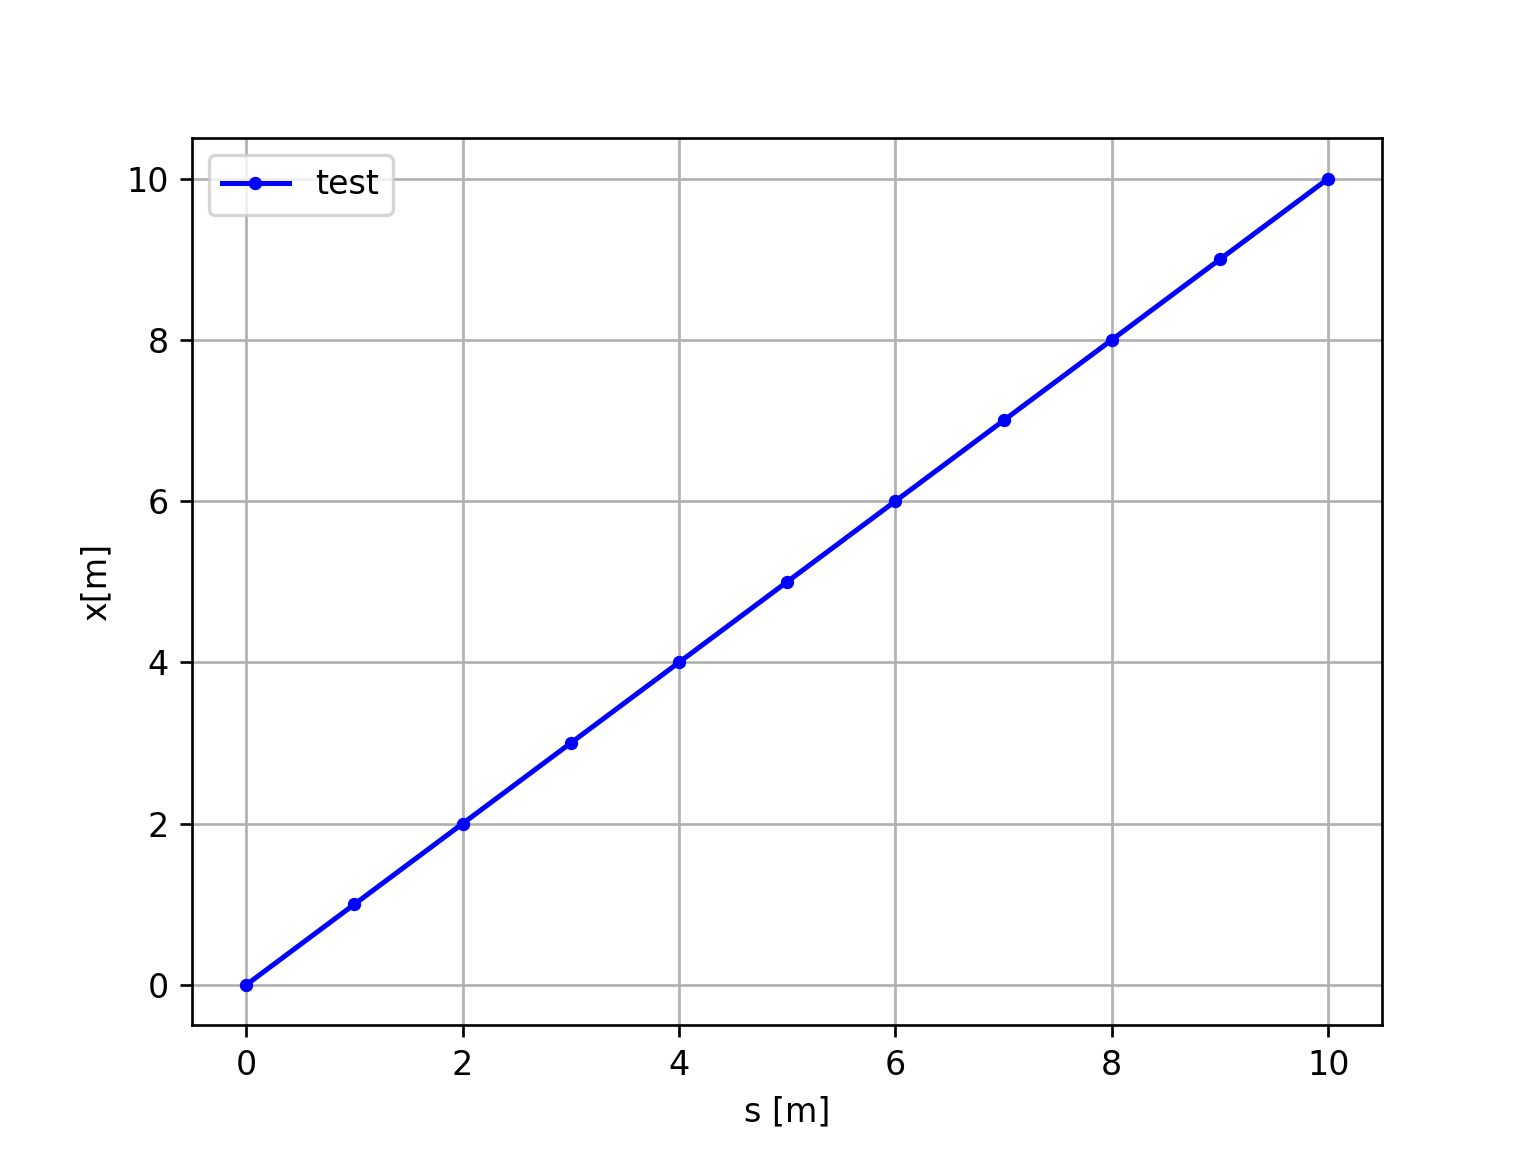

Text(0, 0.5, 'x[m]')

In [8]:
# Plot
%matplotlib notebook
x=[0,1,2,3,4,5,6,7,8,9,10]
y=[0,1,2,3,4,5,6,7,8,9,10]
plt.plot(x,y,'.-b',label='test')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('x[m]') 

# Exercice 1: How do we compute the linear optics of a lattice? <a id="firstexercice"><a>

- I want to motivate first the use of optics codes such as MAD-X and at the same time illustrate the logic behind them.

- Most of the methods implmented in MAD-X as for example the TWISS method are based on matrix multiplications where first and second order transport matrices are used to get the TWISS functions and the closed orbit of your machine.


# FODO cell
- Compute the linear optics functions of a FODO cell which is the simplier combination of quadrupoles required to focuse the beam in both, vertical and horizontal planes (no dispersion, no coupling, no chromticity...).

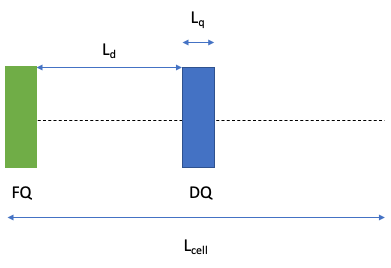

# Thin lens approximation (f>>lq)

- To do some first estimations analytically one uses the thin lense approximation.

In [9]:
# How do we compute the one-turn transfer matrix of the FODO?
K = sp.Symbol("K", positive = True)
Lq = sp.Symbol("Lq", positive = True)
Ld=sp.Symbol("Ld", positive = True)

Mfoc=sp.Matrix([[1,0],[-K*Lq,1]])
Mdefoc=sp.Matrix([[1,0],[K*Lq,1]])
Mdrift=sp.Matrix([[1,Ld],[0,1]])

In [10]:
#################################################
# Transport matrix of half focusing quadrupople #
#################################################
Mfoc

Matrix([
[    1, 0],
[-K*Lq, 1]])

In [11]:
##############################################
# Transport matrix of defocusing quadrupople #
##############################################
Mdefoc

Matrix([
[   1, 0],
[K*Lq, 1]])

In [12]:
##############################################
# Transport matrix of defocusing quadrupople #
##############################################
Mdrift

Matrix([
[1, Ld],
[0,  1]])

In [13]:
M=Mfoc*Mdrift*Mdefoc*Mdrift
M=sp.simplify(M)
M

Matrix([
[   K*Ld*Lq + 1,                Ld*(K*Ld*Lq + 2)],
[-K**2*Ld*Lq**2, -K**2*Ld**2*Lq**2 - K*Ld*Lq + 1]])

In [14]:
M_thin = M.subs(K, 1/(200*5)).subs(Lq, 5).subs(Ld, 45) # units K in m-2, Lq and Ld in m
M_thin

Matrix([
[    1.225,  100.125],
[-0.001125, 0.724375]])

It is clear that the exact solution of the prticle motion has to be calculted in full detail. But using some approximations we can make the first steps easier and estimate the order of magnitud of some magnetic properties of our lattice.

# What can we do with the  transfer matrix?
   - This matrix describes the optical properties of the lattice and defines the beam parameters.
   - We can propagate the phase space coordinates of a particle with a given set of initial coordinates.
   - We can compute the periodic solution TWISS functions.
   - We can make parametric plots.

In [15]:
# Tranfer matrix
R11, R12, R21, R22 = sp.symbols('R11,R12,R21,R22')
Mt=sp.Matrix([[R11,R12],[R21,R22]])
Mt

Matrix([
[R11, R12],
[R21, R22]])

In [16]:
# In case of periodic conditions in the accelerator there is nother way to describe the particles trjectories.
# Periodic solution oner-turn-transfer matrix in terms of twiss functions
a, b, g, m = sp.symbols(r'\alpha,\beta, \gamma,\mu')
M=sp.Matrix([[sp.cos(m)+a*sp.sin(m),b*sp.sin(m)],[-g*sp.sin(m),sp.cos(m)-a*sp.sin(m)]])
M

Matrix([
[\alpha*sin(\mu) + cos(\mu),              \beta*sin(\mu)],
[          -\gamma*sin(\mu), -\alpha*sin(\mu) + cos(\mu)]])

In [17]:
print("Mt=Mone-turn-matrix")

Mt=Mone-turn-matrix


In [18]:
#For the phase advance we use the stability condition: Trace(M) < 2
sp.Eq(sp.cos(m)-(R11+R22)/2)

/Users/nuria/opt/anaconda3/lib/python3.8/site-packages/sympy/core/relational.py:495: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


Eq(-R11/2 - R22/2 + cos(\mu), 0)

In [19]:
#For the beta function we use the R12 matrix element
sp.Eq(R12/sp.sin(m)-b)

Eq(R12/sin(\mu) - \beta, 0)

In [20]:
#For the alfa function we use the trace of the matrix also
sp.Eq((R11-R22)/(2*sp.sin(m))-a)

Eq(-\alpha + (R11 - R22)/(2*sin(\mu)), 0)

In [21]:
#For the gamma we use the R21 element
sp.Eq((R21/sp.sin(m))+g)

Eq(R21/sin(\mu) + \gamma, 0)

Once you have computed the periodic TWISS functions you can propagate them to any point in the machine using the transfer matrix of the TWISS functions from Transverse dynamics course.

In [22]:
sp.Matrix([[R11**2, -2*R12*R11, R12**2],[-R11*R21,R12*R21+R22*R11, -R12*R22],[R21**2,-2*R22*R21, R22**2]])

Matrix([
[  R11**2,        -2*R11*R12,   R12**2],
[-R11*R21, R11*R22 + R12*R21, -R12*R22],
[  R21**2,        -2*R21*R22,   R22**2]])

Using the periodic one-turn-matrix one can define some interesting relations between the TWISS parameters and the magnetic properties of the lattice.

In [23]:
# Relation between the phase advance of the cell and K, Lcell, Lq
a, b, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(d*m/pi-2*sp.asin(K*Lq*Lc/4))

Eq(\Delta*\mu/\pi - 2*asin(K*L_{cell}*L_{q}/4), 0)

<ipython-input-24-85ac7794e4a0>:3: RuntimeWarning: invalid value encountered in arcsin
  y=2*np.arcsin(x/4)/np.pi


<IPython.core.display.Javascript object>


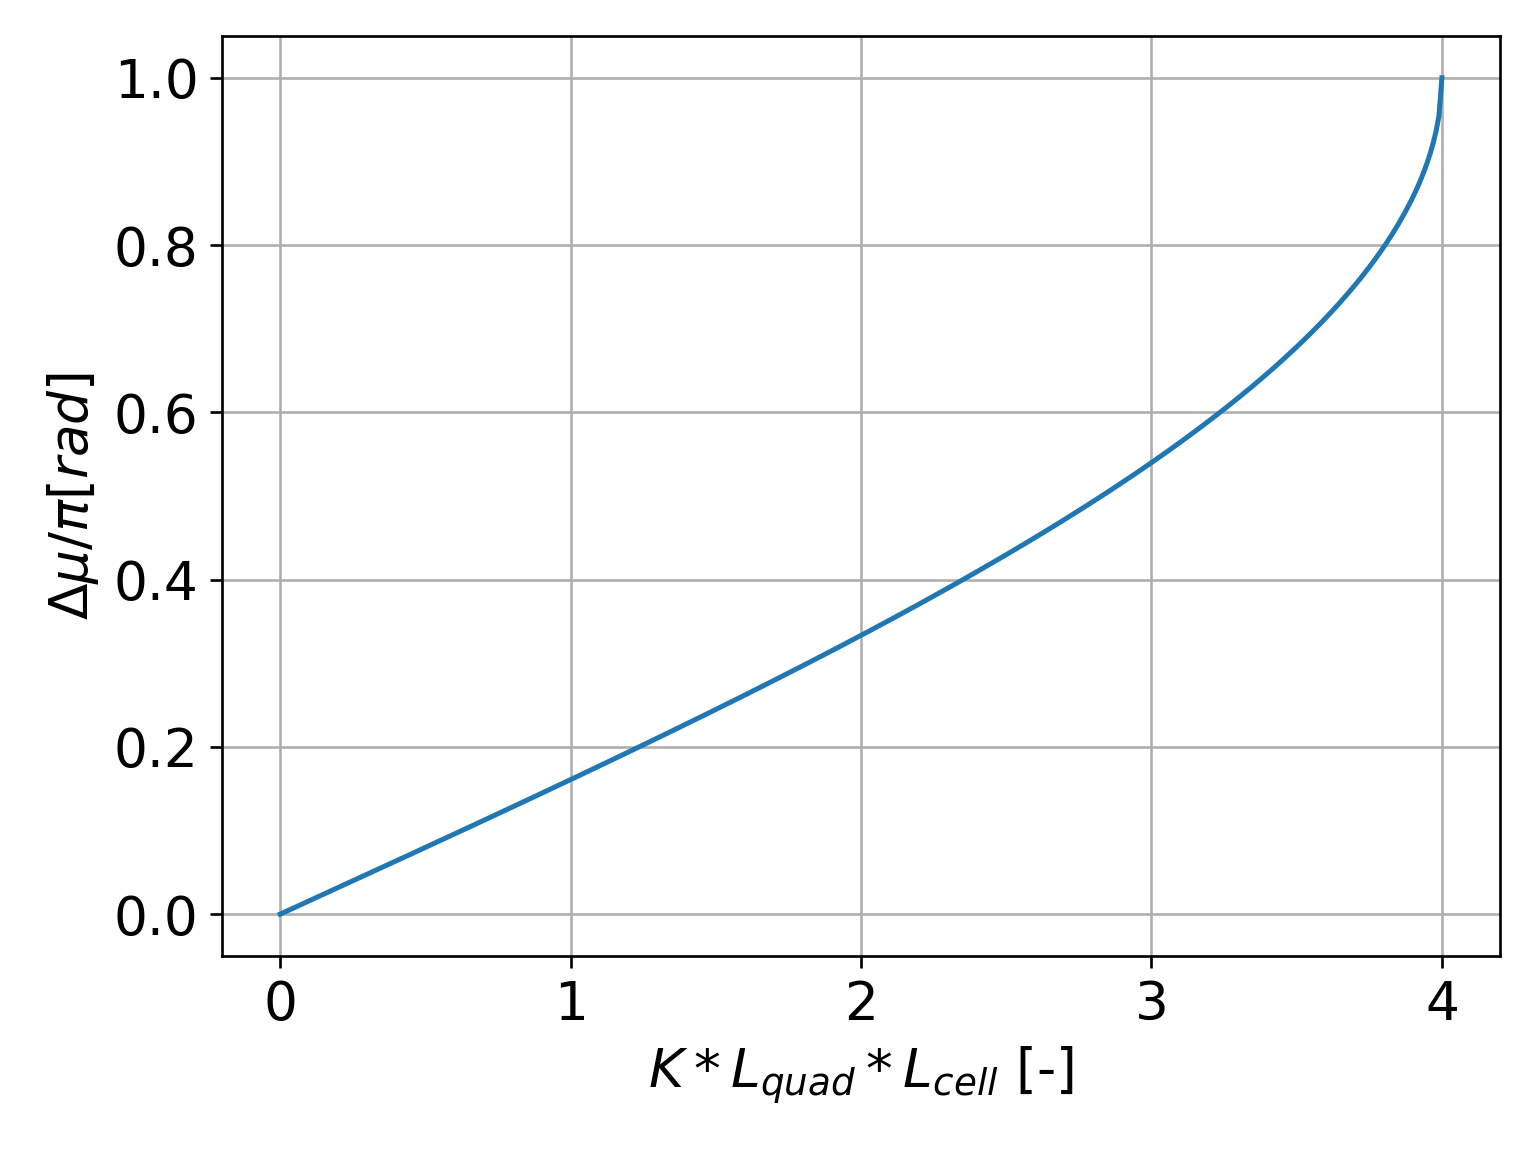

In [24]:
#Add the interesting formula for the FODO cell of mu and bmax and bmin and make the parametric plots
x=np.arange(0,6,0.01)
y=2*np.arcsin(x/4)/np.pi
fig, ax1 = plt.subplots()
ax1.plot(x,y,'-')
ax1.set_ylabel("$\Delta \mu / \pi [rad]$", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
ax1.grid()
ax1.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

# What is the quadrupole strenght needed to match a FODO cell phase advance of 45$^\circ$ if the $L_{quad}$=5 m and $L_{cell}$=100 m?

In [25]:
# Relation between the beta of the cell and K, Lcell, Lq
a, bmin, bmax, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta_{min}, \beta_{max}, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(bmin/Lc-(1-(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))
sp.Eq(bmax/Lc-(1+(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

/Users/nuria/opt/anaconda3/lib/python3.8/site-packages/sympy/core/relational.py:495: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


Eq(-(K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)) + \beta_{max}/L_{cell}, 0)

<IPython.core.display.Javascript object>


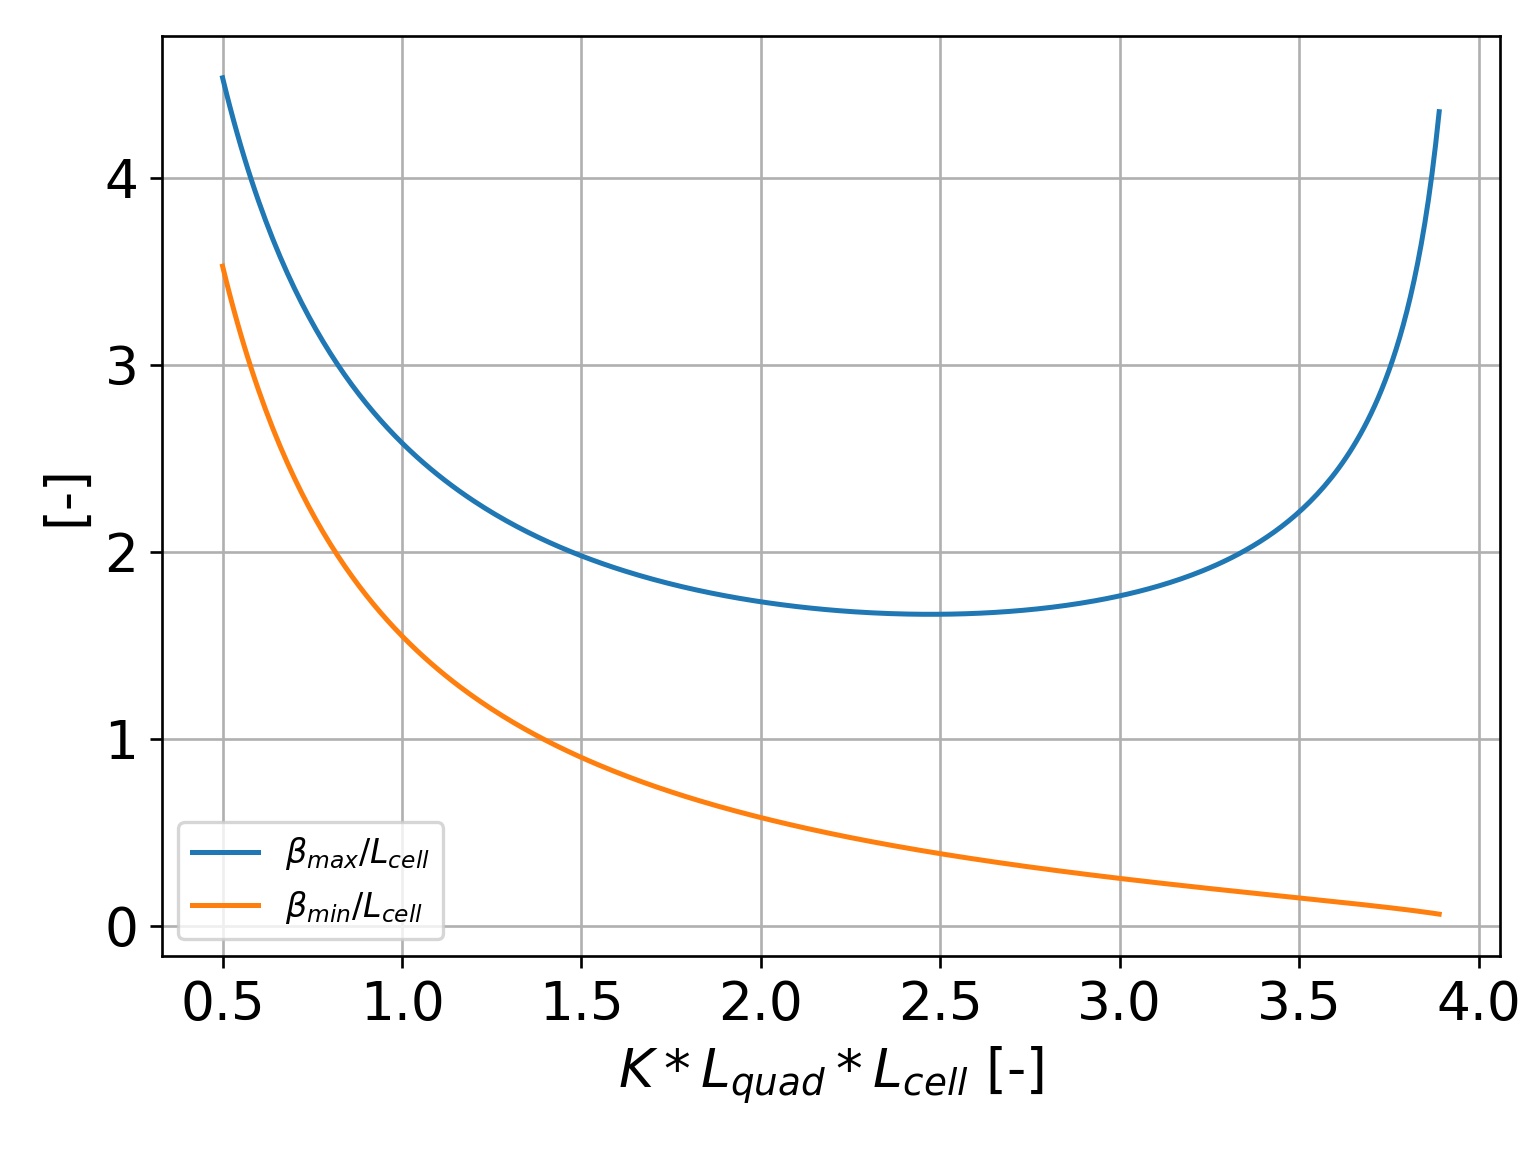

In [26]:
x=np.arange(0.5,3.90,0.01)
betamax=(1+(x/4))/(np.sin(2*np.arcsin(x/4)))
betamin=(1-(x/4))/(np.sin(2*np.arcsin(x/4)))
fig, ax1 = plt.subplots()
ax1.plot(x,betamax,'-',label=r"$\beta_{max}/L_{cell}$")
ax1.plot(x,betamin,'-',label=r"$\beta_{min}/L_{cell}$")
ax1.set_ylabel("[-]", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
plt.grid()
plt.legend()
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

#### Thick lense computation

In [27]:
K = sp.Symbol("K")
Lq = sp.Symbol("Lq")
Ld= sp.Symbol("Ld")

Mfoc=sp.Matrix([[sp.cos(sp.sqrt(K)*Lq),1/(sp.sqrt(K))*sp.sin(sp.sqrt(K)*Lq)],[-(sp.sqrt(K))*sp.sin(sp.sqrt(K)*Lq),sp.cos(sp.sqrt(K)*Lq)]])
Mdefoc=sp.Matrix([[sp.cosh(sp.sqrt(K)*Lq),1/(sp.sqrt(K))*sp.sinh(sp.sqrt(K)*Lq)],[(sp.sqrt(K))*sp.sinh(sp.sqrt(K)*Lq),sp.cosh(sp.sqrt(K)*Lq)]])
Mdrift=sp.Matrix([[1,Ld],[0,1]])

In [28]:
#################################################
# Transport matrix of half focusing quadrupople #
#################################################
Mfoc

Matrix([
[         cos(sqrt(K)*Lq), sin(sqrt(K)*Lq)/sqrt(K)],
[-sqrt(K)*sin(sqrt(K)*Lq),         cos(sqrt(K)*Lq)]])

In [29]:
##############################################
# Transport matrix of defocusing quadrupople #
##############################################
Mdefoc

Matrix([
[        cosh(sqrt(K)*Lq), sinh(sqrt(K)*Lq)/sqrt(K)],
[sqrt(K)*sinh(sqrt(K)*Lq),         cosh(sqrt(K)*Lq)]])

In [30]:
##############################################
# Transport matrix of defocusing quadrupople #
##############################################
Mdrift

Matrix([
[1, Ld],
[0,  1]])

In [31]:
M=Mfoc*Mdrift*Mdefoc*Mdrift
M=sp.simplify(M)
M

Matrix([
[           (sqrt(K)*Ld*cos(sqrt(K)*Lq) + sin(sqrt(K)*Lq))*sinh(sqrt(K)*Lq) + cos(sqrt(K)*Lq)*cosh(sqrt(K)*Lq), sqrt(K)*Ld**2*cos(sqrt(K)*Lq)*sinh(sqrt(K)*Lq) + Ld*sin(sqrt(K)*Lq)*sinh(sqrt(K)*Lq) + 2*Ld*cos(sqrt(K)*Lq)*cosh(sqrt(K)*Lq) + sin(sqrt(K)*Lq)*cosh(sqrt(K)*Lq)/sqrt(K) + cos(sqrt(K)*Lq)*sinh(sqrt(K)*Lq)/sqrt(K)],
[-sqrt(K)*((sqrt(K)*Ld*sin(sqrt(K)*Lq) - cos(sqrt(K)*Lq))*sinh(sqrt(K)*Lq) + sin(sqrt(K)*Lq)*cosh(sqrt(K)*Lq)),      -2*sqrt(K)*Ld*sin(sqrt(K)*Lq)*cosh(sqrt(K)*Lq) + sqrt(K)*Ld*cos(sqrt(K)*Lq)*sinh(sqrt(K)*Lq) - K*Ld**2*sin(sqrt(K)*Lq)*sinh(sqrt(K)*Lq) - sin(sqrt(K)*Lq)*sinh(sqrt(K)*Lq) + cos(sqrt(K)*Lq)*cosh(sqrt(K)*Lq)]])

In [32]:
M_thick = M.subs(K, 1/(200*5)).subs(Lq, 5).subs(Ld,45) # units K in m-2, Lq and Ld in m
M_thick

Matrix([
[    1.24801597796155,  111.155823182084],
[-0.00120832527282141, 0.693651062898885]])

In [33]:
M_thin

Matrix([
[    1.225,  100.125],
[-0.001125, 0.724375]])

In real world applications, lattices (including FODO) are not designed by hand but
dedicated software is used to do the design and simulation as for example MAD-X.

The TWISS in MADX it is based in matrix multiplications similar to what has been shown here however if you want something more complicated it isn't anymore that easy. 

# Wha is next?

- Now we are going to do optics calculations using MAD-X TWISS command (handle thousands of elements, thin or thick lense options, and higher order contributions...).

- We will use the MATCHING MAD-X tool to compute the required magnetic properties for a desired TWISS functions.

- We will use MAD-X to visulize the impact of some propertie of the lattice on the TWISS and single prticle DYNAMICS.

# An introduction to MAD-X using the python interface <a id="intromadx"><a>

In this first part we are going to get familiar with MAD-X syntax.

For more information please refer to the [MAD-X online manual](http://cern.ch/madx/releases/last-rel/madxuguide.pdf).

In [34]:
#Load the cpymad library
from cpymad.madx import Madx 

In [35]:
#Launching MAD-X
myMad = Madx(stdout=True)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.05 12:04:38      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [36]:
#String that will be interpreted by MAD-X
myString='''
stop;
'''

In [37]:
#Using the "input" method to send the commandas to the MAD-X class
myMad.input(myString);


  Number of warnings: 0

  ++++++++++++++++++++++++++++++++++++++++++++
  +          MAD-X finished normally         +
  ++++++++++++++++++++++++++++++++++++++++++++


With the 'stop;' instruction we exit from MAD-X, so, as done in the following cell we need to re-istantiate our MAD-X object with the 
**myMad = Madx()** instruction.

---
It is a good practice to make header, please use '!' to comment the single line.

In [38]:
# Define and print a value
myMad = Madx()
myString='''

!***************************************
! It is a good practice to make a header
!*************************************** 

a= 20;
value a;

'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.05 12:04:39      +
  ++++++++++++++++++++++++++++++++++++++++++++
a                  =                 20 ;


--- 
Use the **help** keyword (very rudimental help)

In [39]:
# To get information about the MAD-X methods (twiss, beam,match... ) use the commnd "help"
myString='''
help, twiss;
'''
myMad.input(myString);

command: twiss  module: twiss
parameter: betx   double value:                  0
parameter: alfx   double value:                  0
parameter: mux   double value:                  0
parameter: bety   double value:                  0
parameter: alfy   double value:                  0
parameter: muy   double value:                  0
parameter: x   double value:                  0
parameter: px   double value:                  0
parameter: y   double value:                  0
parameter: py   double value:                  0
parameter: t   double value:                  0
parameter: pt   double value:                  0
parameter: dx   double value:                  0
parameter: dpx   double value:                  0
parameter: dy   double value:                  0
parameter: dpy   double value:                  0
parameter: wx   double value:                  0
parameter: phix   double value:                  0
parameter: dmux   double value:                  0
parameter: wy   double val

In [40]:
print(list(myMad.elements))

['drift', 'rbend', 'sbend', 'matrix', 'quadrupole', 'sextupole', 'octupole', 'multipole', 'solenoid', 'rfcavity', 'elseparator', 'srotation', 'yrotation', 'xrotation', 'hkicker', 'kicker', 'vkicker', 'hmonitor', 'monitor', 'vmonitor', 'ecollimator', 'rcollimator', 'beambeam', 'instrument', 'marker', 'twcavity', 'thinwire', 'wire', 'slmonitor', 'blmonitor', 'imonitor', 'dipedge', 'changeref', 'translation', 'crabcavity', 'placeholder', 'tkicker', 'hacdipole', 'vacdipole', 'nllens', 'rfmultipole', 'collimator', 'changerefp0', 'sixmarker']


In [41]:
myString='''
help, sbend;
'''
myMad.input(myString);

command: sbend  module: element
double value:              1e+20
parameter: l   double value:                  0
parameter: kmax   double value:                  0
parameter: kmin   double value:                  0
parameter: calib   double value:                  0
parameter: polarity   double value:                  0
parameter: angle   double value:                  0
parameter: tilt   double value:                  0
parameter: k0   double value:                  0
parameter: k0s   double value:                  0
parameter: k1   double value:                  0
parameter: k1s   double value:                  0
parameter: e1   double value:                  0
parameter: e2   double value:                  0
parameter: k2   double value:                  0
parameter: k2s   double value:                  0
parameter: h1   double value:                  0
parameter: h2   double value:                  0
parameter: hgap   double value:                  0
parameter: fint   double value:

# Let's define the main ingredients to design a simple lattice and compute the optics in MAD-X!

# Definition of main parameters

In [42]:
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=100;
quadrupoleLenght=5;
f=200;
myK:=1/f/quadrupoleLenght;// m^-2

'''
myMad.input(myString);

# Definition of magets

In [43]:
myString='''

! *********************************************************************
! Definition of magnets
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;
'''
myMad.input(myString);

# Definition of sequence

In [44]:
myString='''

! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at=0;
marker1: marker, at=25;
quadrupole2: QD, at=50;
endsequence;

'''
myMad.input(myString);

# Definition of the beam

In [45]:
myString='''

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

'''
myMad.input(myString);

# Activate sequence

In [46]:
myString='''

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

'''
myMad.input(myString);

# Execute action

In [47]:
myString='''

! *********************************************************************
! TWISS
! *********************************************************************
title, 'My first twiss';
twiss;

'''

# All together
Output:

-SUMM table

-TWISS table

In [48]:
myMad = Madx(stdout=True)
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=100;
quadrupoleLenght=5;
f=200;
myK:=1/f/quadrupoleLenght;// m^-2

! *********************************************************************
! Definition of magnets
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;

! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at=0;
marker1: marker, at=25;
quadrupole2: QD, at=50;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
title, 'My first twiss';
select, flag=TWISS, column=keyword, name, s, betx, bety, x, y, dx, dy;
twiss, file=Tutorial1_Part1.madx;
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="test",file=Tutorial1_Part1;
'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.05 12:04:45      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
     0.03853349451     -0.04384718845        463.6232883                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.03853349451 

               dq2            betymax              dymax 

# Accessing the data

In [312]:
#######################
#Using MAD-X commands #
#######################

myString='''
value, table(SUMM,Q1);
value, table(SUMM,betymax);
'''
myMad.input(myString);

table( summ q1 )   =      0.03853349451 ;
table( summ betymax ) =        463.6232883 ;


In [313]:
myString='''
value, table(TWISS,MYCELL$END,betx);
value, table(TWISS,MYCELL$END,bety);
'''
myMad.input(myString);

table( twiss mycell$end betx ) =        463.6232883 ;
table( twiss mycell$end bety ) =        369.7791616 ;


# Using python pandas library

For advance users...

Pandas dataframe are very convenient, have a look in https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf.

In [314]:
# Using another method from cpymad "table.twiss.dframe()"
myDF=myMad.table.twiss.dframe()

In [315]:
myDF

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.0,463.623288,-1.156109,0.000000,369.779162,0.929316,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,463.623288,1.156109,0.001709,369.779162,-0.929316,0.002161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,25.0,419.394867,1.055312,0.008930,408.967742,-1.030113,0.010350,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marker1,marker1:1,marker,25.0,419.394867,1.055312,0.008930,408.967742,-1.030113,0.010350,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,50.0,369.779162,0.929316,0.019041,463.623288,-1.156109,0.019493,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole2,quadrupole2:1,quadrupole,55.0,369.779162,-0.929316,0.021202,463.623288,1.156109,0.021202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,100.0,463.623288,-1.156109,0.038533,369.779162,0.929316,0.038533,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#e,mycell$end:1,marker,100.0,463.623288,-1.156109,0.038533,369.779162,0.929316,0.038533,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [316]:
myDF[['name','s','betx','bety','alfx','alfy']]

,name,s,betx,bety,alfx,alfy
#s,mycell$start:1,0.0,463.623288,369.779162,-1.156109,0.929316
quadrupole1,quadrupole1:1,5.0,463.623288,369.779162,1.156109,-0.929316
drift_0[0],drift_0:0,25.0,419.394867,408.967742,1.055312,-1.030113
marker1,marker1:1,25.0,419.394867,408.967742,1.055312,-1.030113
drift_1[0],drift_1:0,50.0,369.779162,463.623288,0.929316,-1.156109
quadrupole2,quadrupole2:1,55.0,369.779162,463.623288,-0.929316,1.156109
drift_2[0],drift_2:0,100.0,463.623288,369.779162,-1.156109,0.929316
#e,mycell$end:1,100.0,463.623288,369.779162,-1.156109,0.929316


In [317]:
myDF["s"]

#s               0.0
quadrupole1      5.0
drift_0[0]      25.0
marker1         25.0
drift_1[0]      50.0
quadrupole2     55.0
drift_2[0]     100.0
#e             100.0
Name: s, dtype: float64

In [68]:
myDF["betx"]

#s             463.623288
quadrupole1    463.623288
drift_0[0]     419.394867
marker1        419.394867
drift_1[0]     369.779162
quadrupole2    369.779162
drift_2[0]     463.623288
#e             463.623288
Name: betx, dtype: float64

# Basic plot

In [318]:
#Plot
plt.plot(myDF['s'],myDF['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF['s'],myDF['bety'],'.-r',label='$\\beta_y$')
#Labels of the plot
plt.xlabel('s [m]')
plt.ylabel('[m]')
#Legend and grid
plt.legend(loc='best')
plt.grid()

Text(0.5, 66.60000000000001, 's [m]')

Text(56.93750000000002, 0.5, '[m]')

# For reference

---
This is an example to get familiar with the use of the physical constants and the formatting of the output. Have a look on the difference.

In [425]:
myString='''
a=pi;
value a; 
set, format="22.20e";
value a; 
'''
myMad.input(myString);

++++++ info: a redefined
a                  =        3.141592654 ;
a                  = 3.14159265358979311600e+00 ;


# 
This is an example to get familiar with if and deferred expression. Please note the after the block delimited with {...} the ; can be omitted. Pay attention to circular call!


In [213]:
myString='''
if (1==1){
option, echo=false, info=true;
a=pi;
b:=a;
c=a;
value a; 
value b;
value c;
a=CLIGHT*cos(a);
value a;
value b;
value c;}
! BEWARE of circular call!
!a:=a+1;
! When evaluating you will get a fatal error
! value a; 
option, echo=true, info=true;
'''
myMad.input(myString);

++++++ info: a redefined
a                  =        3.141592654 ;
b                  =        3.141592654 ;
c                  =        3.141592654 ;
++++++ info: a redefined
a                  =         -299792458 ;
b                  =         -299792458 ;
c                  =        3.141592654 ;


# ---
This is an example to get familiar with **while** and **macros** loops.

In [214]:
myString='''
a(myvariable1,myvariable2): macro = {
value, myvariable1;
value, myvariable1*myvariable2;
}

N=1;
while (N<10){
exec, a(N,N);
N=N+1;
}
'''
myMad.input(myString);

n                  =                  1 ;
n*n                =                  1 ;
++++++ info: n redefined
n                  =                  2 ;
n*n                =                  4 ;
++++++ info: n redefined
n                  =                  3 ;
n*n                =                  9 ;
++++++ info: n redefined
n                  =                  4 ;
n*n                =                 16 ;
++++++ info: n redefined
n                  =                  5 ;
n*n                =                 25 ;
++++++ info: n redefined
n                  =                  6 ;
n*n                =                 36 ;
++++++ info: n redefined
n                  =                  7 ;
n*n                =                 49 ;
++++++ info: n redefined
n                  =                  8 ;
n*n                =                 64 ;
++++++ info: n redefined
n                  =                  9 ;
n*n                =                 81 ;
++++++ info: n redefined


---
### List of functions
In MAD-X the following functions are available

- SQRT(x) square root,
- LOG(x) natural logarithm,
- LOG10(x) logarithm base 10,
- EXP(x) exponential,
- SIN(x) trigonometric sine,
- COS(x) trigonometric cosine,
- TAN(x) trigonometric tangent,
- ASIN(x) arc sine,
- ACOS(x) arc cosine,
- ATAN(x) arc tangent,
- SINH(x) hyperbolic sine,
- COSH(x) hyperbolic cosine,
- TANH(x) hyperbolic tangent,
- SINC(x) cardinal sine function,
- ABS(x) absolute value,
- ERF(x) Gauss error,
- ERFC(x) complementary error,
- FLOOR(x) floor, largest previous integer,
- CEIL(x) ceiling, smallest next integer,
- ROUND(x) round, closest integer,
- FRAC(x) fractional part of number,
- RANF() random number, uniformly distributed in [0,1],
- GAUSS() random number, gaussian distribution with unit standard deviation,
- TGAUSS(x) random number, gaussian distribution with unit standard deviation, truncated at x standard deviations;

---
### List of physical constant

| MAD-X name  | symbol  |  value |unit|
|:-:|:-:|:-:|:-:|
|PI| π |4 * atan(1)| 1|
|TWOPI|2π| 2 * PI| 1|
|DEGRAD| 180/π |180 / PI| deg/rad|
|RADDEG| π/180 |PI / 180 |rad/deg|
|E| e |exp(1) |1|
|EMASS| me |0.510998928e−3| GeV|
|PMASS| mp |0.938272046| GeV|
|NMASS| u |0.931494061| GeV|
|MUMASS| mµ| 0.1056583715 |GeV|
|CLIGHT| c| 299792458| m/s|
|QELECT| e| 1.602176565e−19| A.s|
|HBAR| ¯h| 6.58211928e−25| MeV.s|
|ERAD| re| 2.8179403267e−15| m|
|PRAD| re(me/mp)| ERAD*EMASS/PMASS| m|

# Inheritance and -> operator